In [32]:
from PIL import Image

In [12]:
for im in ['FormalMen.jpeg', 'FormalWomen.jpg', 'others.jpg', 'SaudiMen.jpg', 'SaudiWomen.jpeg']:
    print(f'{im}', cv2.imread(im).shape)

FormalMen.jpeg (251, 201, 3)
FormalWomen.jpg (626, 501, 3)
others.jpg (626, 417, 3)
SaudiMen.jpg (626, 351, 3)
SaudiWomen.jpeg (275, 183, 3)


In [33]:
Image.open('others.jpeg').resize((451, 626)).save(f'resised_others.jpeg')

In [21]:
for im in ['FormalMen.jpeg', 'FormalWomen.jpg', 'others.jpg', 'SaudiMen.jpg', 'SaudiWomen.jpeg']:
    Image.open(im).resize((451, 626)).save(f'resised_{im}')

In [1]:
!pwd

/content


In [2]:
%cd '/content/drive/MyDrive/AI Task'

/content/drive/MyDrive/AI Task


# Model

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow as tf

In [5]:
model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

In [6]:
flatten = tf.keras.layers.Flatten()(model.output)
output_dense = tf.keras.layers.Dense(5, activation='softmax')(flatten)

final_model = tf.keras.models.Model(
    inputs=model.input, outputs=output_dense
)

final_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ["accuracy"]
)

final_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │         125,445 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,840,133 (56.61 MB)

 Trainable params: 14,840,133 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

# Data

In [29]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [8]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255.,
    validation_split = 0.20,
    horizontal_flip=True,
    preprocessing_function = preprocess_input
)


test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255.,
    preprocessing_function = preprocess_input
)

In [9]:
train_data_gen = train_generator.flow_from_directory(
    directory = 'Data/train',
    subset = 'training',
    target_size = (224, 224),
    batch_size = 16
)

Found 100 images belonging to 5 classes.


In [10]:
val_data_gen = train_generator.flow_from_directory(
    directory = 'Data/train',
    subset = 'validation',
    shuffle = False,
    target_size = (224, 224),
    batch_size = 1
)

Found 20 images belonging to 5 classes.


In [11]:
test_data_gen = test_generator.flow_from_directory(
    directory = 'Data/test',
    shuffle = False,
    target_size = (224, 224),
)

Found 30 images belonging to 5 classes.


In [43]:
class_indices = test_data_gen.class_indices
class_indices

{'Formal Men': 0,
 'Formal Women': 1,
 'Others': 2,
 'Saudi Men': 3,
 'Saudi Women': 4}

In [13]:
for batch, classes in train_data_gen:
    print(batch.shape)
    print(classes.shape)
    break

(16, 224, 224, 3)
(16, 5)


In [14]:
classes

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

# Training

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
steps_per_epoch = train_data_gen.samples // train_data_gen.batch_size
val_steps = val_data_gen.samples // val_data_gen.batch_size

In [17]:
hist = final_model.fit(
    train_data_gen,
    epochs = 20,
    # steps_per_epoch = steps_per_epoch,
    validation_data = val_data_gen,
    # validation_steps = val_steps
)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.2212 - loss: 1.6988 - val_accuracy: 0.3000 - val_loss: 1.5815
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 317ms/step - accuracy: 0.3521 - loss: 1.5401 - val_accuracy: 0.4000 - val_loss: 1.4385
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 269ms/step - accuracy: 0.5392 - loss: 1.2226 - val_accuracy: 0.5500 - val_loss: 1.1605
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 287ms/step - accuracy: 0.7256 - loss: 0.7643 - val_accuracy: 0.5500 - val_loss: 1.0569
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step - accuracy: 0.8156 - loss: 0.5434 - val_accuracy: 0.6500 - val_loss: 0.9254
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.9401 - loss: 0.1945 - val_accuracy: 0.6000 - val_loss: 0.8847
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 0.9185 - loss: 0.3199 - val_accuracy: 0.7000 - val_loss: 0.6797
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 300ms/step - accuracy: 0.9498 - loss: 0.1366 - val_accuracy: 0.8000 - val_loss: 0

# Result Visualization

In [18]:
from matplotlib import pyplot as plt

In [19]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

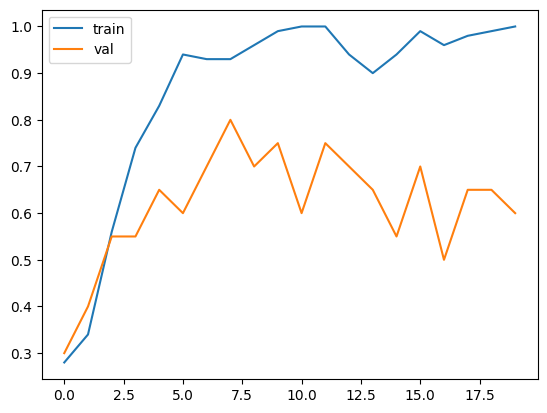

In [20]:
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.legend()
# plt.axis('off')
plt.show()

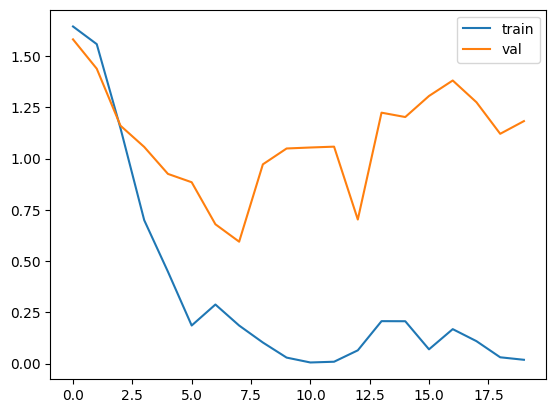

In [21]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.legend()
# plt.axis('off')
plt.show()

# Testing

In [22]:
final_model.evaluate(test_data_gen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.7333 - loss: 1.1772


[1.1772054433822632, 0.7333333492279053]

In [73]:
list(class_indices.keys())

['Formal Men', 'Formal Women', 'Others', 'Saudi Men', 'Saudi Women']

# Model Usage

In [25]:
import tensorflow as tf

In [27]:
model = tf.keras.models.load_model('model.keras')

In [28]:
ims = ['FormalMen.jpeg', 'FormalWomen.jpg', 'others.jpg', 'SaudiMen.jpg', 'SaudiWomen.jpeg']

In [30]:
img = tf.keras.utils.load_img(ims, target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)

TypeError: path should be path-like or io.BytesIO, not <class 'list'>

In [31]:
import os
os.path.split('jdhd\jddhs\dhd\jhsd.kkk')

('jdhd\\jddhs\\dhd', 'jhsd.kkk')

In [95]:
def predict(path):
    img = tf.keras.utils.load_img(path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img)

    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_array = preprocess_input(img_array)/255.
    img_array = tf.expand_dims(img_array, 0)
    predictions = final_model.predict(img_array, verbose=0)[0]
    score = tf.nn.softmax(predictions)
    cls = list(class_indices.keys())[tf.argmax(score)]
    print(
        "This image most likely belongs to ___{}___ with a {:.2f} percent confidence."
        .format(cls, 100 * tf.reduce_max(score))
    )

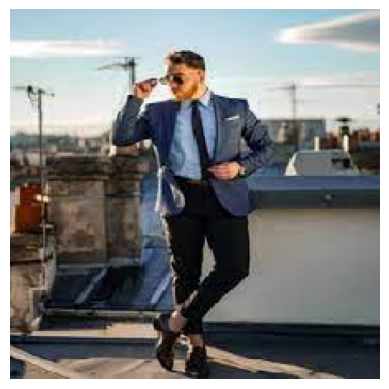

This image most likely belongs to ___Formal Men___ with a 33.97 percent confidence.


In [101]:
predict('Data/test/Formal Men/20.jpeg')

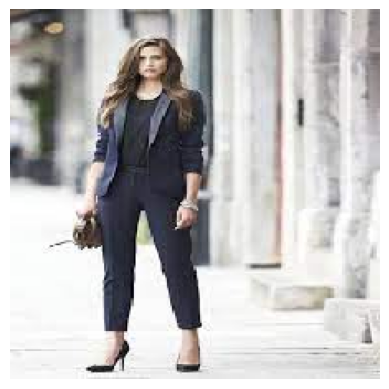

This image most likely belongs to ___Formal Women___ with a 36.09 percent confidence.


In [103]:
predict('Data/test/Formal Women/10.jpeg')

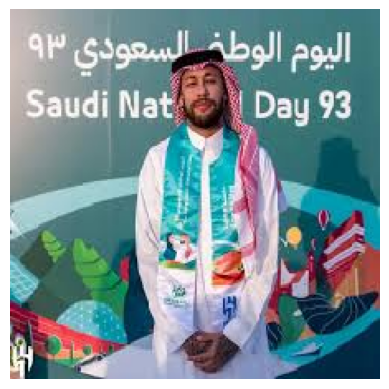

This image most likely belongs to ___Saudi Men___ with a 33.22 percent confidence.


In [104]:
predict('Data/test/Saudi Men/25.jpeg')

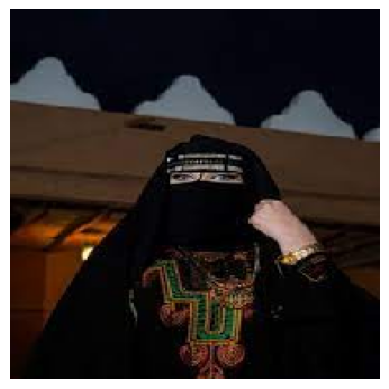

This image most likely belongs to ___Saudi Women___ with a 25.69 percent confidence.


In [105]:
predict('Data/test/Saudi Women/20.jpeg')

In [72]:
# final_model.save('model/model.keras')